# **Multinomial Naive Bayer**

# 1. Data Preparation

## 1.1 Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk


## 1.2 Baca Dataset

In [ ]:
df = pd.read_csv('mldataset_v1.csv')
df.head()

,to,based,on,of,their,and,you,model,different,classify,...,attributes,height,other,color,fabric,style,call,caller,phone,label
0,1,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(600, 334)

In [ ]:
df.columns

Index(['to', 'based', 'on', 'of', 'their', 'and', 'you', 'model', 'different',
       'classify',
       ...
       'attributes', 'height', 'other', 'color', 'fabric', 'style', 'call',
       'caller', 'phone', 'label'],
      dtype='object', length=334)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 334 entries, to to label
dtypes: int64(334)
memory usage: 1.5 MB


In [ ]:
df.dtypes

to        int64
based     int64
on        int64
of        int64
their     int64
          ...  
style     int64
call      int64
caller    int64
phone     int64
label     int64
Length: 334, dtype: object

In [ ]:
df['label'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
df['label'].value_counts()

label
1    100
2    100
3    100
4    100
5    100
6    100
Name: count, dtype: int64

In [ ]:
dupes = df.columns[df.columns.duplicated()]
print(dupes)


Index([], dtype='object')


In [ ]:
df.columns.value_counts()


to        1
based     1
on        1
of        1
their     1
         ..
style     1
call      1
caller    1
phone     1
label     1
Name: count, Length: 334, dtype: int64

# 2. EDA

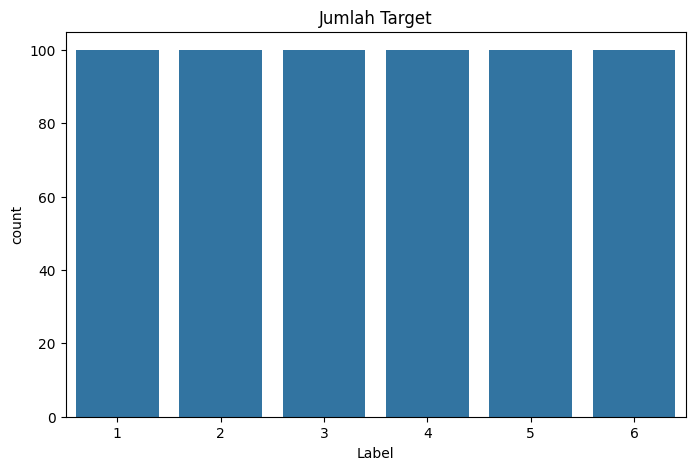

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Jumlah Target')
plt.xlabel('Label')
plt.show()

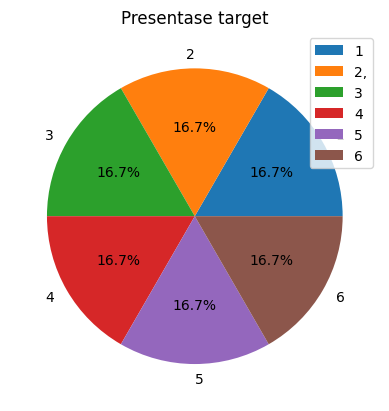

In [ ]:
plt.pie(df['label'].value_counts(), labels=df['label'].value_counts().index, autopct='%1.1f%%')
plt.title('Presentase target')
plt.legend(['1', '2,', '3',  '4', '5', '6'])
plt.show()

# 4. Modeling

## 4.1 Pisah variabel Independent dan Dependent

In [ ]:
X = df.drop('label', axis=1).values # Independent
y = df['label'].values # Dependent

## 4.2  Split data Train dan Test

In [ ]:
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.75 * len(X))

X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test  = X[indices[train_size:]]
y_test  = y[indices[train_size:]]

### 4.3 Split Kelas

In [ ]:
classes = np.unique(y_train)
classes 

array([1, 2, 3, 4, 5, 6])

In [ ]:
# Pisah kelas
class_data = {}
for c in classes:
    X_c = X_train[y_train == c]  
    class_data[c] = X_c

print(f"Jumlah data kelas 1: {class_data[1].shape[0]}")
print(f"Jumlah data kelas 2: {class_data[2].shape[0]}")
print(f"Jumlah data kelas 3: {class_data[3].shape[0]}")
print(f"Jumlah data kelas 4: {class_data[4].shape[0]}")
print(f"Jumlah data kelas 5: {class_data[5].shape[0]}")
print(f"Jumlah data kelas 6: {class_data[6].shape[0]}")

SyntaxError: invalid syntax (2153863565.py, line 7)

In [ ]:
# Likelihood
total_data = X_train.shape[0]
prior = {}

for c in class_data:
    prior[c] = class_data[c].shape[0] / total_data

for c in prior:
    print(f"Prior kelas {c} = {prior[c]:3f}")

Prior kelas 1 = 0.160000
Prior kelas 2 = 0.177778
Prior kelas 3 = 0.155556
Prior kelas 4 = 0.173333
Prior kelas 5 = 0.162222
Prior kelas 6 = 0.171111


In [ ]:
texts = df.columns

def build_vocab(texts):
    vocab = set()
    for sentence in texts:
        for word in sentence.split():
            vocab.add(word)
    return sorted(list(vocab))

vocab = build_vocab(texts)
print("Vocabulary:", vocab)
print("Jumlah vocab:", len(vocab))


Vocabulary: ['abnormal', 'about', 'acceleration', 'account', 'activity', 'algorithm', 'an', 'and', 'animals', 'anomalies', 'appearance', 'apples', 'article', 'articles', 'as', 'atmospheric', 'attributes', 'audio', 'average', 'bacteria', 'bananas', 'banking', 'based', 'basketball', 'bayes', 'bedrooms', 'behavior', 'birds', 'books', 'braking', 'browsing', 'business', 'call', 'caller', 'calls', 'campaigns', 'can', 'card', 'career', 'categories', 'certain', 'characteristics', 'churning', 'claim', 'claims', 'classifier', 'classify', 'clothing', 'clouds', 'color', 'commerce', 'computer', 'concerns', 'condition', 'conditions', 'content', 'create', 'credit', 'cricket', 'crops', 'customer', 'customers', 'data', 'dataset', 'decision', 'defects', 'demand', 'demographic', 'demographics', 'design', 'destinations', 'detect', 'develop', 'developing', 'diagnostic', 'diet', 'dietary', 'different', 'digits', 'dimensions', 'disease', 'documents', 'duration', 'efficiency', 'email', 'emails', 'emissions', 

In [ ]:

n_features = X_train.shape[1]

likelihood = {}

for c in classes:
    X_c = X_train[y_train == c]     
    word_count_c = X_c.sum(axis=0)  
    total_words_c = word_count_c.sum()
    
    likelihood[c] = (word_count_c + 1) / (total_words_c + 1 * n_features)


In [ ]:
def predict_one(x):
    posteriors = {}
    
    for c in classes:
        log_prior = np.log(prior[c])
        log_likelihood = np.sum(x * np.log(likelihood[c]))
        posteriors[c] = log_prior + log_likelihood
        
    return max(posteriors, key=posteriors.get)


In [ ]:
y_pred = np.array([predict_one(x) for x in X_test])


In [ ]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9266666666666666


In [ ]:
def predict_one(x):
    max_prob = -np.inf
    best_class = None

    for c in classes:
        log_prob = np.log(prior[c])
        log_prob += np.sum(np.log(likelihood[c]) * x)   # x = vector fitur
        if log_prob > max_prob:
            max_prob = log_prob
            best_class = c
    return best_class


In [ ]:
def predict_one(x):
    max_prob = -np.inf
    best_class = None

    for c in classes:
        log_prob = np.log(prior[c])
        log_prob += np.sum(np.log(likelihood[c]) * x)   # x = vector fitur
        if log_prob > max_prob:
            max_prob = log_prob
            best_class = c
    return best_class


In [ ]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])
print(conf_matrix)




[[ 0  0]
 [ 0 25]]


In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall    = TP / (TP + FN) if (TP + FN) != 0 else 0

f1_score = 2 * (precision * recall) / (precision + recall) \
           if (precision + recall) != 0 else 0

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1_score)


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


In [ ]:

def preprocess_input(text, vocab):
    # Membuat vektor fitur dari input user
    words = text.lower().split()
    features = np.zeros(len(vocab), dtype=int)
    for idx, word in enumerate(vocab):
        features[idx] = words.count(word)
    return features

def predict_question():
    question = entry.get()
    if question.strip() == "":
        messagebox.showwarning("Input Error", "Silakan masukkan pertanyaan!")
        return
    x_input = preprocess_input(question, vocab)
    label_pred = predict_one(x_input)
    messagebox.showinfo("Hasil Prediksi", f"Label prediksi: {label_pred}")

root = tk.Tk()
root.title('Naive Bayes Multinomial')
root.geometry('500x200')
root.resizable(0,0)

label = tk.Label(root, text='Masukkan pertanyaan:').pack(pady=10)
entry = tk.Entry(root, font=('Popins', 12), width=50)
entry.pack(pady=5)

button = tk.Button(root, text='PREDIKSI!', command=predict_question)
button.pack(pady=20)

root.mainloop()

NameError: name 'tk' is not defined

In [ ]:
# root = tk.Tk()


# title = root.title('Naive Bayes Multinomial')
# root.geometry('500x300+400+200')
# root.resizable(0,0)

# label = tk.Label(root, text='Predict').pack(pady=30)

# entry = tk.Entry(root, font=('Popins'))
# entry.pack() 

# def mbox():
#     ans = entry.get()
#     if ans == "":
#         messagebox.showwarning("isi woi")
#     else:
#         messagebox.showinfo(f"")

# button = tk.Button(root, text='PREDIKSI!', command=mbox).pack(pady=10)

# root.mainloop()